In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('datasets/POS_TRANSACTIONS_2018 .csv', index_col=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459258 entries, 2 to 3
Data columns (total 4 columns):
Transaction_Id      459258 non-null int64
Transaction_Date    459258 non-null object
Product_Name        459258 non-null object
Quantity            459258 non-null int64
dtypes: int64(2), object(2)
memory usage: 17.5+ MB


In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Task 4 : Association Mining

In [11]:
## Preprocessing
## Identify significant measurements/values
print('----Transaction_Id----')
print(df['Transaction_Id'].describe())
print('-------Transaction_Date-------')
print(df['Transaction_Date'].describe())
print('----Product_Name----')
print(df['Product_Name'].describe())
print('----Quantity----')
print(df['Quantity'].describe())

----Transaction_Id----
count    4.592580e+05
mean     6.179884e+05
std      3.511578e+05
min      1.235900e+04
25%      3.124370e+05
50%      6.168260e+05
75%      9.254420e+05
max      1.221866e+06
Name: Transaction_Id, dtype: float64
-------Transaction_Date-------
count         459258
unique             7
top       12/28/2017
freq           97866
Name: Transaction_Date, dtype: object
----Product_Name----
count                459258
unique                   17
top       Sketching Markers
freq                  73951
Name: Product_Name, dtype: object
----Quantity----
count    459258.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: Quantity, dtype: float64


In [12]:
transactions = df.groupby(['Transaction_Id'])['Product_Name'].apply(list)
print(transactions.head(10))

Transaction_Id
12359                                      [Exercise book]
12362           [Mini Stationery Set, Mini Stationery Set]
12365                                         [Flash Card]
12371                                       [Drink bottle]
12380                                          [DVD media]
12383           [Mini Stationery Set, Mini Stationery Set]
12386           [Mini Stationery Set, Mini Stationery Set]
12392               [Certificate Frame, Sketching Markers]
12401    [Exercise book, Exercise book, Lanyards, Sketc...
12404                                      [Exercise book]
Name: Product_Name, dtype: object


In [13]:
from apyori import apriori
# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.03, min_confidence=0.1))
# print first 5 rules
print(results[:5])

[RelationRecord(items=frozenset({'DVD media'}), support=0.146885, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'DVD media'}), confidence=0.146885, lift=1.0)]), RelationRecord(items=frozenset({'Exercise book'}), support=0.171005, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Exercise book'}), confidence=0.171005, lift=1.0)]), RelationRecord(items=frozenset({'Flash Card'}), support=0.160425, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Flash Card'}), confidence=0.160425, lift=1.0)]), RelationRecord(items=frozenset({'Lanyards'}), support=0.134925, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Lanyards'}), confidence=0.134925, lift=1.0)]), RelationRecord(items=frozenset({'Sketching Markers'}), support=0.241305, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Sketching Markers'}), confidence=0.241305, lift=1.0

In [14]:
def convert_apriori_results_to_pandas_df(results):
    rules = []

    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add), rule_set.support, rule.confidence, rule.lift])
#             if len(rule.items_base) > 0:
#                 for item in rule.items_base:
#                     if item == 'Exercise book':
#                         rules.append([','.join(rule.items_base), ','.join(rule.items_add), rule_set.support, rule.confidence, rule.lift])
#                     break
            
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift'])

result_df = convert_apriori_results_to_pandas_df(results)

In [15]:
# sort all acquired rules descending by lift
print('v------------------------------Lift------------------------------------v')
result_df = result_df.sort_values(by='Lift', ascending=False)
print(result_df.head(20))

v------------------------------Lift------------------------------------v
            Left_side         Right_side   Support  Confidence      Lift
6           DVD media      Exercise book  0.043660    0.297239  1.738191
7       Exercise book          DVD media  0.043660    0.255314  1.738191
12      Exercise book         Flash Card  0.039780    0.232625  1.450053
13         Flash Card      Exercise book  0.039780    0.247966  1.450053
15           Lanyards      Exercise book  0.033015    0.244691  1.430903
14      Exercise book           Lanyards  0.033015    0.193065  1.430903
8           DVD media         Flash Card  0.032080    0.218402  1.361397
9          Flash Card          DVD media  0.032080    0.199969  1.361397
11  Sketching Markers          DVD media  0.036335    0.150577  1.025136
10          DVD media  Sketching Markers  0.036335    0.247370  1.025136
1                          Exercise book  0.171005    0.171005  1.000000
0                              DVD media  0.146885 

In [66]:
new_df = result_df[result_df['Left_side'] == 'Exercise book']
print(new_df.head(20))

        Left_side         Right_side   Support  Confidence      Lift
7   Exercise book          DVD media  0.043660    0.255314  1.738191
12  Exercise book         Flash Card  0.039780    0.232625  1.450053
14  Exercise book           Lanyards  0.033015    0.193065  1.430903
16  Exercise book  Sketching Markers  0.040535    0.237040  0.982325


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

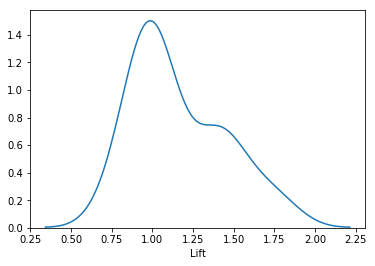

In [17]:
sns.distplot(result_df['Lift'].dropna(), hist=False)

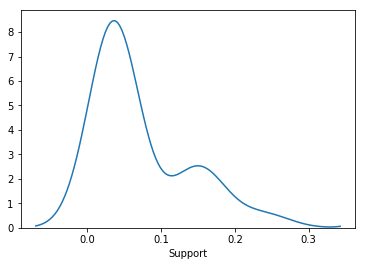

In [18]:
sns.distplot(result_df['Support'].dropna(), hist=False)

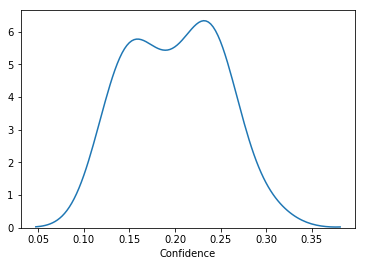

In [19]:
sns.distplot(result_df['Confidence'].dropna(), hist=False)